# EDA TripAdvisor dataset

In this notebook you can find the EDA for sprint 1.

We will first start with loading the dataset and the required libraries.

In [1]:
# Import pandas and read csv using pandas
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from random import shuffle
from sklearn.model_selection import train_test_split
original_df = pd.read_csv("./tripadvisor_dataset/restaurant_listings.csv")

# display the data and see how it formulated
pd.set_option("display.max_columns", None)
original_df.head(2)

rank         restaurant name    general rating number of reviews  \
0   #1  Kin Khao - Thai Eatery  5.0 of 5 bubbles       922 reviews   
1   #1           't Sleutelgat  5.0 of 5 bubbles       200 reviews   

                                        tags  \
0  $$ - $$$|Thai|Healthy|Vegetarian Friendly   
1               $$$$|French|Belgian|European   

                                 address      phone number  \
0  Donkersteeg 21-23, Ghent 9000 Belgium  +32 468 10 59 59   
1       Kasseide 78, Ninove 9400 Belgium   +32 54 56 63 09   

                            website url                          menu url  \
0                http://www.kinkhao.be/  http://www.kinkhao.be/site/menu/   
1  http://www.restaurant-sleutelgat.be/                               NaN   

   timetable                     email address  travelers choice  michelin  \
0       True                   gent@kinkhao.be              True     False   
1       True  restaurant_sleutelgat@telenet.be             False      True   

   food rating  service rating  value rating  atmosphere rating  \
0          5.0             5.0           4.5               -1.0   
1          5.0             5.0           4.5                5.0   

                                         description dutch description  \
0  Differing from formal dining establishments, K...               NaN   
1                                                NaN               NaN   

  price range                   cuisines  \
0   €10 - €28              Thai, Healthy   
1   €32 - €74  French, Belgian, European   

                                       special diets           meals  \
0  Vegetarian Friendly, Vegan Options, Gluten Fre...  Dinner, Drinks   
1  Vegetarian Friendly, Vegan Options, Gluten Fre...   Lunch, Dinner   

                                 restaurant features        id  
0  Reservations, Seating, Serves Alcohol, Free Wi...  13969825  
1  Free Wifi, Reservations, Outdoor Seating, Seat...    740727

The first thing we'll do is plot a null heatmap.

In [2]:
import plotly.express as px
#pip install --upgrade nbformat

px.imshow(original_df.replace(-1,np.nan).isna(),title="Null Heatmap")


From this plot we can see that there are more null values in the bottom rows of the dataset than in the top, so for our analysis it is better to shuffle the data before we make a test-train split

## Splitting the data

The first thing we'll do is split the data in a test set and a trainings set. This is to avoid data snooping when we finally want to use ML

In [3]:

df_train, df_test = train_test_split(original_df,test_size=0.2,train_size=0.8,shuffle=True)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 451 to 11
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1884 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1895 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1888 non-null   object 
 7   website url          1733 non-null   object 
 8   menu url             698 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1064 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null   f

## Clean the data

we will start with numeric data, labeling each attribute with the correct type

In [4]:
print(df_train.info())
df_train.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 451 to 11
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1884 non-null   object 
 1   restaurant name      2064 non-null   object 
 2   general rating       2064 non-null   object 
 3   number of reviews    2064 non-null   object 
 4   tags                 1895 non-null   object 
 5   address              2064 non-null   object 
 6   phone number         1888 non-null   object 
 7   website url          1733 non-null   object 
 8   menu url             698 non-null    object 
 9   timetable            2064 non-null   bool   
 10  email address        1064 non-null   object 
 11  travelers choice     2064 non-null   bool   
 12  michelin             2064 non-null   bool   
 13  food rating          2064 non-null   float64
 14  service rating       2064 non-null   float64
 15  value rating         2064 non-null   f

rank  restaurant name    general rating number of reviews  \
451   #211  uzume sushi bar  4.0 of 5 bubbles       107 reviews   
1023  #403    Korenlei Twee  3.5 of 5 bubbles       467 reviews   

                                 tags                         address  \
451   $$ - $$$|Japanese|Seafood|Sushi  Oudburg 43, Ghent 9000 Belgium   
1023        $$$$|French|Belgian|Dutch  Korenlei 2, Ghent 9000 Belgium   

         phone number                  website url  \
451   +32 9 233 15 84    http://www.uzumesushi.be/   
1023  +32 9 224 00 73  http://www.korenleitwee.be/   

                                         menu url  timetable  \
451   http://www.uzumesushibar.be/Menu-Restaurant       True   
1023                 https://www.korenleitwee.be/       True   

              email address  travelers choice  michelin  food rating  \
451   oudburg@uzumesushi.be             False     False          4.5   
1023   info@korenleitwee.be             False     False          4.0   

      service rating  value rating  atmosphere rating  \
451              4.0           4.0               -1.0   
1023             3.5           3.5                4.0   

                                            description dutch description  \
451   Uzume Sushi Bar is hét adres voor overheerlijk...               NaN   
1023                                                NaN               NaN   

     price range                                   cuisines  \
451    €20 - €50     Grill, Japanese, Seafood, Sushi, Asian   
1023   €20 - €65  French, Belgian, Dutch, Seafood, European   

            special diets                      meals  \
451   Vegetarian Friendly              Lunch, Dinner   
1023  Vegetarian Friendly  Lunch, Dinner, Late Night   

                                    restaurant features       id  
451   Takeout, Reservations, Outdoor Seating, Buffet...  7895642  
1023  Reservations, Outdoor Seating, Seating, Serves...   809864

we will start by turning rank, general rating, number of reviews to numerical values

In [5]:

df_train["rank"]=df_train["rank"].str.replace("#","").astype(float)
df_train["general rating"]=df_train["general rating"].map(lambda x: x.split(" ")[0]).astype(float)
df_train["number of reviews"]=df_train["number of reviews"].map(lambda x: x.split(" ")[0].replace(",","")).astype(float)

we can start by looking at the distributions of these numerical features

In [6]:
numerical_cols=df_train.select_dtypes(include= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [7]:
#drop id because its not relevant for the plot
numerical_cols=numerical_cols.drop("id")
numerical_cols

Index(['rank', 'general rating', 'number of reviews', 'food rating',
       'service rating', 'value rating', 'atmosphere rating'],
      dtype='object')

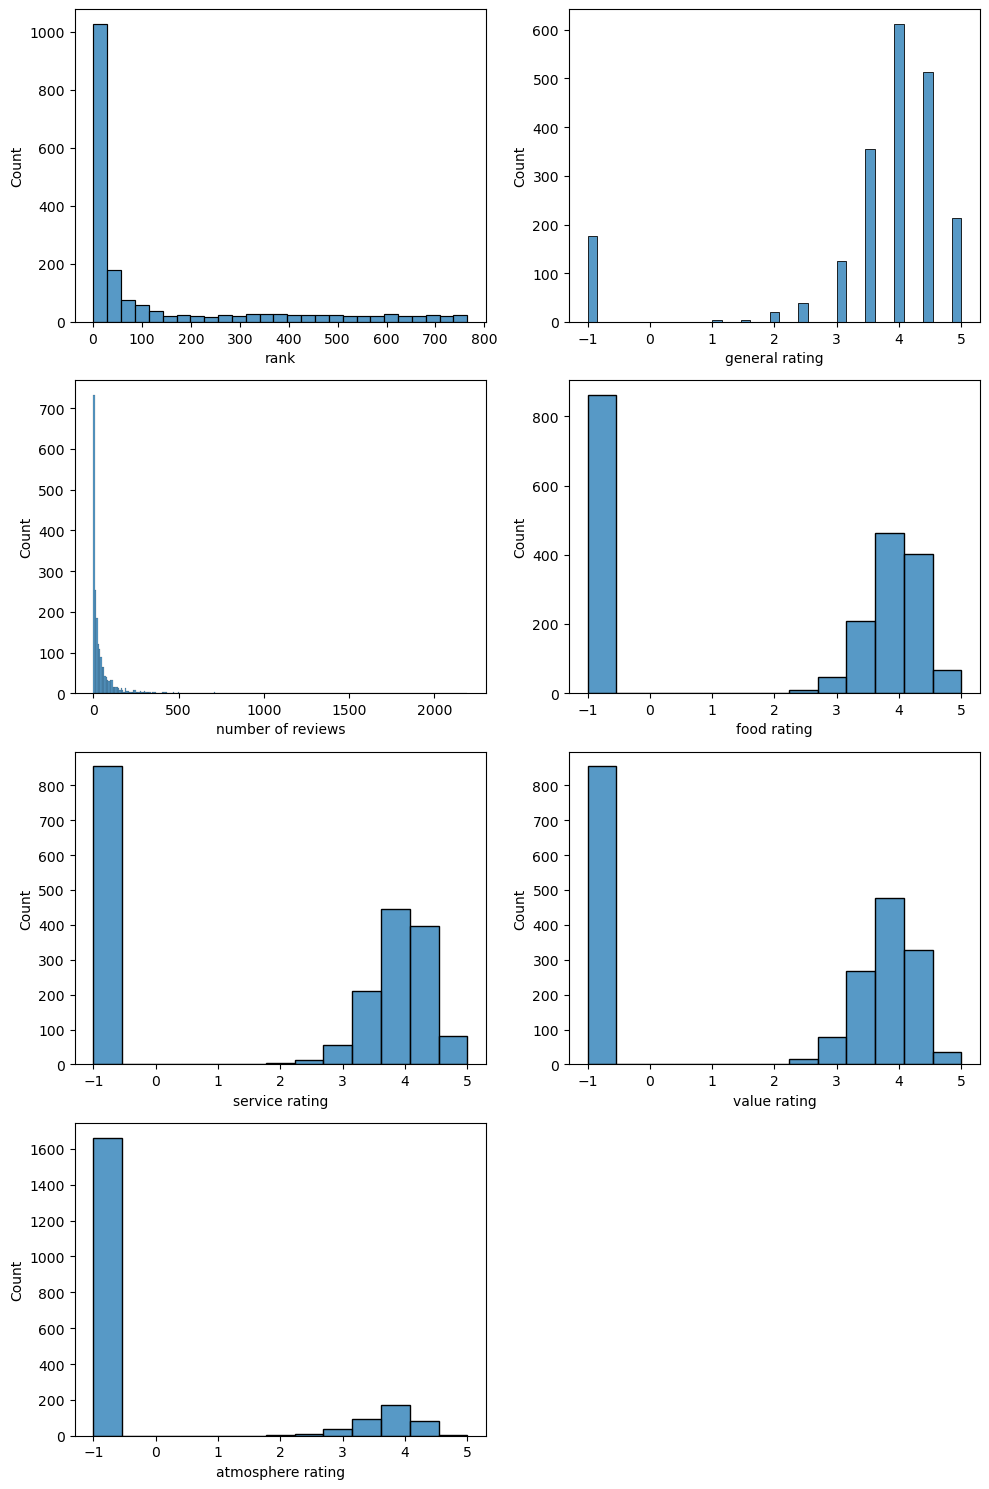

In [8]:
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,2,i+1)
    sns.histplot(df_train[col])
fig.tight_layout()
plt.show()

what we can see from these distributions is:
* most restaurants have a low rank (lower is better)
* ratings with value -1 mean that they are missing data, there is a lot of missing data visible
* food rating, general rating , value rating and service rating seem to have the same distribution. Maybe they give us the same information and are redundant.

let's take a closer look at number of reviews

## number of reviews

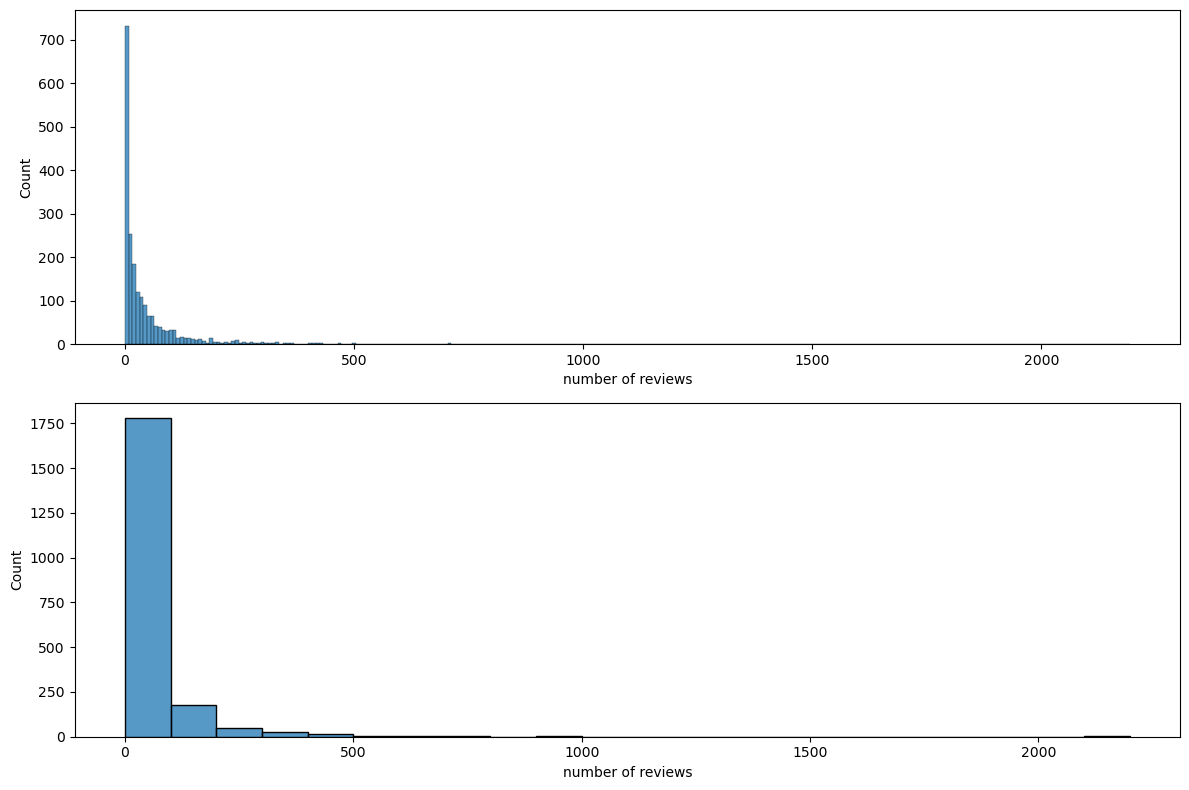

In [9]:
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.histplot(df_train["number of reviews"])
plt.subplot(2,1,2)
sns.histplot(df_train["number of reviews"],binwidth=100)
fig.tight_layout()
plt.show()


In [10]:
print(df_train["number of reviews"].value_counts().sort_index())
zeros=df_train["number of reviews"].isna().sum()
print(f"number of missing values is {zeros}")

0.0       177
1.0       111
2.0        95
3.0        82
4.0        67
         ... 
981.0       1
1484.0      1
1906.0      1
2140.0      1
2193.0      1
Name: number of reviews, Length: 274, dtype: int64
number of missing values is 0


There are a lot of restaurants with 0 reviews and no missing values. How many exactly?

In [11]:
perc_no_review=df_train["number of reviews"].value_counts()[0]/len(df_train)
print(f"{perc_no_review*100:.2f}% of the restaurants have no reviews!")


8.58% of the restaurants have no reviews!


We decide a treshhold for restaurants with low reviews = 4. So restaurants with 3 or less reviews we consider "hidden treasures"

In [12]:
perc_hidden=df_train["number of reviews"].value_counts()[0:3].sum()/len(df_train)
print(f"percentage of hidden treasures: {perc_hidden*100:.2f}%")

percentage of hidden treasures: 22.53%


are they really hidden treasures?
* what are the ratings of these hidden treasures? maybe they don't have many reviews bacause people don't eat there because the food is bad or maybe because of the location.
* is there a correlation between the location of a restaurant and the fact if its a hidden treasure or not? maybe there are clusters? maybe big cities don't have these "hidden treasures"

we will come back to this later, first we can start by extracting the city

In [13]:
df_train['city'] = df_train["address"].str.split(', ').str[-1].str.split(" ").str[0]

We wrote a script to get the coordinates for each restaurant in our dataset. That script will be included with our submission (see getCoordinated.ipynb) notebook. We saved the locations in a csv file with a format: (restaurantid,latitude,longitude)

## Hidden treasures
lets look at these hidden treasures in more detail (remember, hidden treasures are restaurants that have less than 4 ratings)

In [14]:
hidden_treasures=df_train[df_train["number of reviews"]<=3]
hidden_treasures.replace(-1,np.nan).isna().sum()

rank                   179
restaurant name          0
general rating         177
number of reviews        0
tags                   113
address                  0
phone number            83
website url            146
menu url               418
timetable                0
email address          252
travelers choice         0
michelin                 0
food rating            465
service rating         465
value rating           465
atmosphere rating      465
description            353
dutch description      408
price range              0
cuisines               123
special diets          464
meals                  256
restaurant features    416
id                       0
city                     0
dtype: int64

In [15]:
len(hidden_treasures)

465

we can see that all of the hidden treasures have no food/service/value-rating!
Also, a lot of them don't have a rank.

let's plot some graphs to see if we can get some more insights

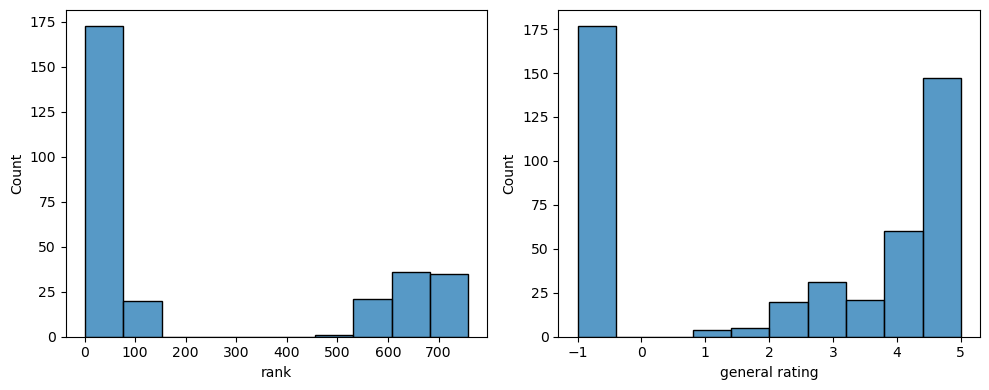

In [16]:
# cheap_restaurants_with_rating=cheap_restaurants.replace(-1,np.nan).dropna()
fig=plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(hidden_treasures["rank"])
plt.subplot(1,2,2)
sns.histplot(hidden_treasures["general rating"])
fig.tight_layout()
plt.show()

very interesting to see that there is a clear seperation! we have hidden treasures with ranks < 200 and with ranks >400. but no in between


maybe we can find out why by looking at their ratings

In [17]:
hidden_treasures_low_rank=hidden_treasures[hidden_treasures["rank"]<200]
hidden_treasures_high_rank=hidden_treasures[hidden_treasures["rank"]>400]
hidden_treasures_no_rank=hidden_treasures[hidden_treasures["rank"].isna()]
print(f"low: {len(hidden_treasures_low_rank)} high: {len(hidden_treasures_high_rank)} no={len(hidden_treasures_no_rank)}")
print("remember, lower rank is better!")

low: 193 high: 93 no=179
remember, lower rank is better!


let's look in detail at the hidden treasures with no ranking information

In [28]:
import plotly.express as px
#pip install --upgrade nbformat

px.imshow(hidden_treasures_no_rank.replace(-1,np.nan).isna(),title="Null Heatmap")


My god! they have no numerical information available at all
(╯°□°）╯︵ ┻━┻

<AxesSubplot: xlabel='general rating', ylabel='Count'>

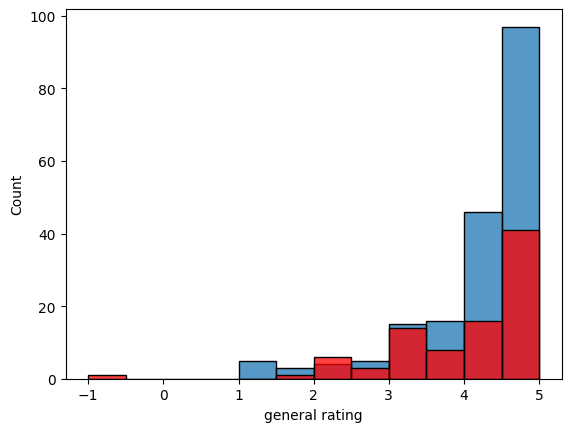

In [ ]:
# hidden_treasures_low_rank["general rating"].value_counts().plot.bar()
# hidden_treasures_high_rank["general rating"].value_counts().plot.bar()
sns.histplot(binwidth=0.5,
            x="general rating",
            data=hidden_treasures_low_rank,
            stat="count",legend=True)
sns.histplot(binwidth=0.5,
            x="general rating",
            data=hidden_treasures_high_rank,
            color="red",
            stat="count",legend=True)

In [ ]:
print(hidden_treasures_low_rank["general rating"].describe())
hidden_treasures_high_rank["general rating"].describe()


count    191.000000
mean       4.081152
std        0.959693
min        1.000000
25%        3.750000
50%        4.500000
75%        5.000000
max        5.000000
Name: general rating, dtype: float64


count    90.000000
mean      3.933333
std       1.117280
min      -1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: general rating, dtype: float64

on average there is not much difference in general rating between the high ranking and the low ranking hidden treasures, a lower ranking hidden treasure has on average a rating that's a little bit better than a high ranking hidden treasure

let's try to plot them on the map to see why they might have so few reviews

In [ ]:
coords=pd.read_csv("coordinaten2.csv").replace(0,np.nan)
hidden_treasures_low_rank=hidden_treasures_low_rank.merge(coords,on="id")
hidden_treasures_high_rank=hidden_treasures_high_rank.merge(coords,on="id")
hidden_treasures_no_rank=hidden_treasures_no_rank.merge(coords,on="id")

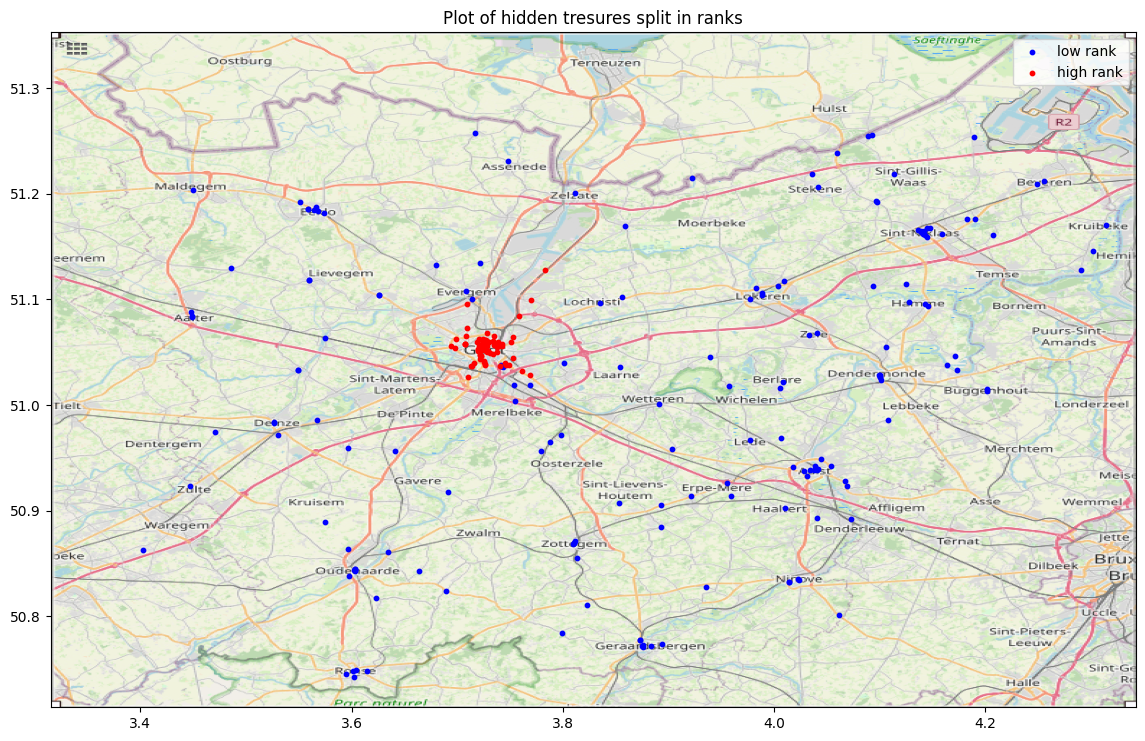

In [ ]:
Bbox = (3.3151,4.3423,50.7139,51.3529)
map = plt.imread("east_flanders.png")

figure, ax = plt.subplots(figsize = (14,16))

ax.scatter(hidden_treasures_low_rank.longitude, hidden_treasures_low_rank.latitude, zorder=1, alpha= 1, c='b',s=10)
ax.scatter(hidden_treasures_high_rank.longitude, hidden_treasures_high_rank.latitude, zorder=1, alpha= 1, c='r',s=10,)

ax.set_title('Plot of hidden tresures split in ranks')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])
ax.legend(["low rank","high rank","no rank"])
ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')

We can clearly see that the hidden treasures with high ranks are spread out over East-Flanders. If I find a restaurant with a low amount of reviews (hidden treasure) and it has a high rank, then the propability is very high that it is located in or near Ghent.


But that still didn't anwser our question, why do these restaurants have low reviews? And is the location the only factor that influences their ranking?

We were curious about how this ranking system works so we looked up some stuff online [The Secret to Improving Your Tripadvisor Ranking](https://www.checkfront.com/blog/improve-your-tripadvisor-ranking-with-this-one-simple-tip/#:~:text=Tripadvisor%27s%20ranking%20algorithm%20looks%20at,consistency%20of%20incoming%20positive%20reviews.)

here we found that your ranking as based on:
* the quantity of your reviews
* the recency of your reviews
* the quality of your reviews

so for these hidden treasures we already know, the quantity of our reviews is low. So the most obvious thing to look at next was if there was a big difference in their review quality.

In [ ]:
reviews=pd.read_csv("./tripadvisor_dataset/reviews.csv")
reviews.head(2)

id reviewer name                                           title  \
0  13969825      bertd818                  supper snelle en lekkere lunch   
1  13969825  593laetitiad  Un délicieux repas aux saveurs de la Thaïlande   

                 date  rating  \
0  September 26, 2022     5.0   
1  September 24, 2022     5.0   

                                              review  
0  supper lekker gegeten tijdens de middag, als w...  
1  Un menu lunch très bien équilibré aux niveaux ...

let's extract the year from these reviews and then join them together with the other dataframes

In [ ]:
reviews["review_year"]=reviews.date.str.split(" ").str[-1].astype(int)

In [ ]:
hidden_treasures_low_rank=hidden_treasures_low_rank.merge(reviews,on="id")
hidden_treasures_high_rank=hidden_treasures_high_rank.merge(reviews,on="id")


<AxesSubplot: xlabel='rating', ylabel='Count'>

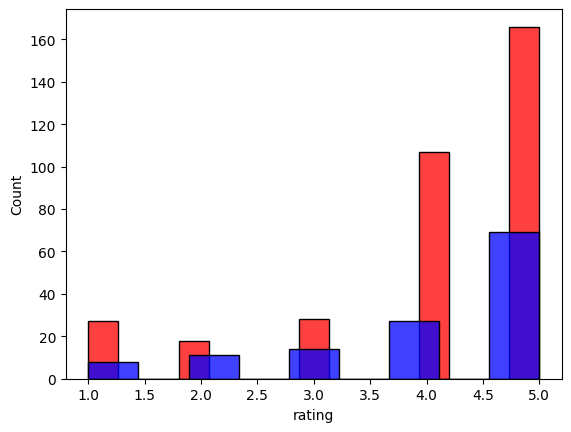

In [ ]:
sns.histplot(hidden_treasures_low_rank.rating,color="red")
sns.histplot(hidden_treasures_high_rank.rating,color="blue")

In [ ]:
print(hidden_treasures_low_rank.rating.mean())
print(hidden_treasures_high_rank.rating.mean())

4.0606936416184976
4.069767441860465


I don't really see a difference between the review-ratings, so the difference in their ranks must be caused by something else. Let's dig a little bit deeper

2019.9537572254335
2019.2713178294573


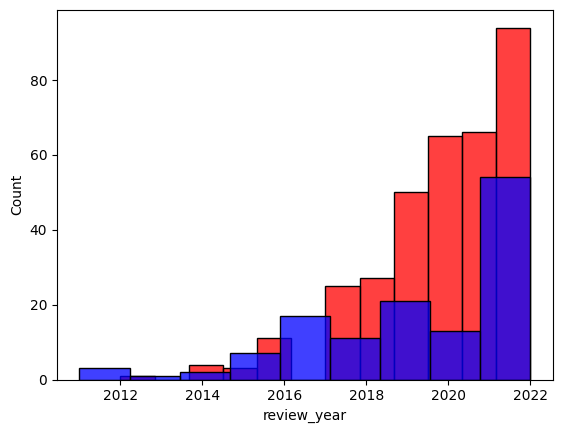

In [ ]:
sns.histplot(hidden_treasures_low_rank["review_year"],color="red")
sns.histplot(hidden_treasures_high_rank["review_year"],color="blue")
print(hidden_treasures_low_rank["review_year"].mean())
print(hidden_treasures_high_rank["review_year"].mean())

I officially give up. I admit my defeat 😢, I can't seem to find why these restaurants have so little reviews. I did find out that in these hidden treasures we can seperate 2 groups, those with a high rank, those with a low rank (and those with no ranking information). We also found out that one of the causes of this ranking difference is the location. 

If your restaurant is located in a big city and you have not many reviews then you're actually performing worse than a restaurant that has the same amount of reviews but is located in a random neighborhood. That might be the cause of the ranking difference. So atleast we did find out this interesting fact from all of these plots :) 

So if we look back at [The Secret to Improving Your Tripadvisor Ranking](https://www.checkfront.com/blog/improve-your-tripadvisor-ranking-with-this-one-simple-tip/#:~:text=Tripadvisor%27s%20ranking%20algorithm%20looks%20at,consistency%20of%20incoming%20positive%20reviews.). Through our data analysis we discovered that this is not completely true, it also depends on your location.

## Price Range
now we can also look at the price range

In [ ]:
df_train["price range"]

724     No pricing available
920                 €7 - €17
1357    No pricing available
2335                €7 - €20
1599               €11 - €26
                ...         
1672    No pricing available
265                €16 - €50
1397    No pricing available
1921                €9 - €26
2072    No pricing available
Name: price range, Length: 2064, dtype: object

we can split this up into upper_price and lowr_price if it's available

In [ ]:
temp=df_train["price range"].str.replace("No pricing available","nan - nan").str.replace("€","").str.split("-",expand=True).rename(columns={0:"lower price",1:"upper price"})
df_train["lower_price"]=temp["lower price"].astype(float)
df_train["upper_price"]=temp["upper price"].astype(float)


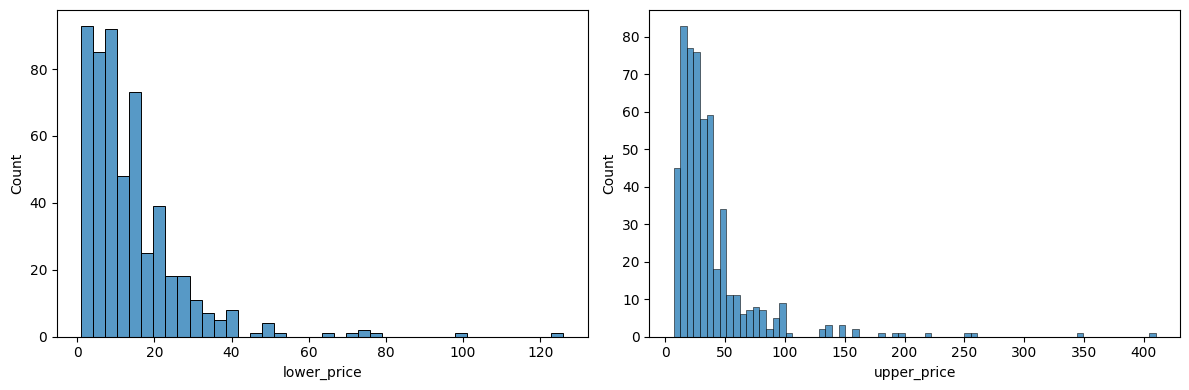

In [ ]:
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df_train["lower_price"])
plt.subplot(1,2,2)
sns.histplot(df_train["upper_price"])
fig.tight_layout()
plt.show()


as we can see there are restaureants who have minimum prices of €100 and upper prices of more than €400, lets check if that's not a typo

In [ ]:
high_upper=df_train[df_train["upper_price"]>150]
high_upper[["restaurant name","rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price","meals"]]

restaurant name   rank  general rating  number of reviews  \
533                Ter schroeven    5.0             4.5               61.0   
737   Restaurant Jan Van den Bon  305.0             3.5              112.0   
1268                         K27  478.0             4.5               11.0   
2195                Divan Palace  713.0             3.0                9.0   
272                       Amatsu  141.0             4.0              149.0   
1344                       iGent  496.0             4.5               18.0   
22                  Portobelfino    2.0             4.5              400.0   
2158                  Keysershof    2.0             3.0               97.0   
14                 Hof van Cleve    1.0             5.0              472.0   
982                   Asian King  389.0             4.0               33.0   

      michelin  food rating  service rating  value rating  atmosphere rating  \
533      False          4.5             4.5           4.5                4.5   
737       True          4.0             3.5           3.0                3.0   
1268     False         -1.0            -1.0          -1.0               -1.0   
2195     False          3.5             3.5           4.0               -1.0   
272       True          4.5             4.5           4.0                4.0   
1344     False          1.0             1.5           1.5                1.0   
22       False          4.5             4.5           4.5                4.5   
2158     False          3.5             3.5           3.0                3.5   
14        True          5.0             5.0           4.5                4.5   
982      False          4.0             4.0           4.0               -1.0   

      lower_price  upper_price                      meals  
533          71.0        190.0  Lunch, Dinner, Late Night  
737          73.0        220.0              Lunch, Dinner  
1268          2.0        349.0                     Drinks  
2195          2.0        410.0   Breakfast, Lunch, Dinner  
272          39.0        157.0         Dinner, Late Night  
1344          1.0        200.0              Lunch, Dinner  
22          100.0        250.0  Lunch, Dinner, Late Night  
2158         39.0        158.0              Lunch, Dinner  
14          126.0        260.0  Lunch, Dinner, Late Night  
982           4.0        180.0              Lunch, Dinner

from the restaurants who have high upper prices:
* there is 1 with a michelin star
* on average they have a general rating >=4
* the lower price is exteremely low! maybe because they include drinks in their lower price
* we conclude that rank is only partly affected by rating. The restaurant Amatsu has a michelin star, which means the food, service,... is excellent but it's rank is only 272. Average people don't go to michelin starred restaurant very often so that is maybe the cause of the lower rank.
* the data is a little messed up. iGent has an upper price of €200. as students of Ghent University we can testify that that is incorrect

from this we can conclude that we have to look at these price ranges with a grain of salt. because not all of them are correct/sometimes drinks are included


<span style="color:red">notice because of the shuffeling of our data before the train, test-split the examples of restaurants mention in our conclusions might not be visible in the dataframe </span>

## cheap_restaurants

let's analyze the cheap restaurants, we defined cheap as upper_price<=30

In [ ]:
cheap_restaurants=df_train[df_train["upper_price"]<=30]
cheap_restaurants=cheap_restaurants[["restaurant name","rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price","meals","city","id"]]

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



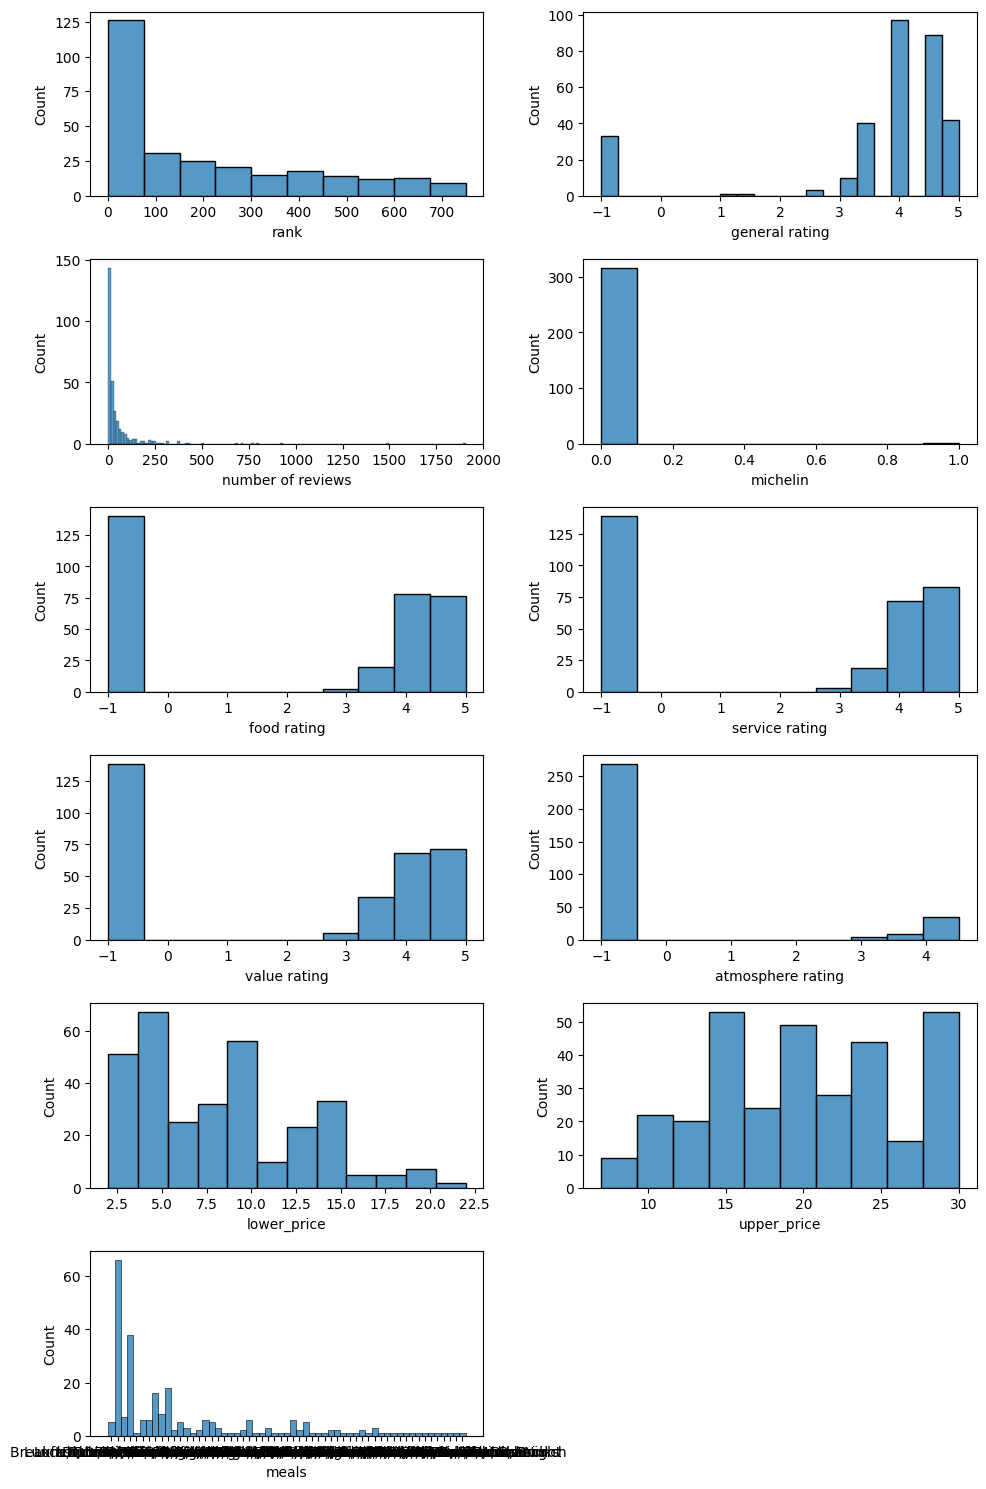

In [ ]:
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(["rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price","meals"]):
    plt.subplot(6,2,i+1)
    sns.histplot(cheap_restaurants[col])
fig.tight_layout()
plt.show()

* we can see that a lot of cheap restaurants have a low rank (which is good)
* we can see a very clear peak in the meals chart, lets take a closer look


In [ ]:
cheap_restaurants.meals.value_counts()
meals=cheap_restaurants.meals.str.split(",",expand=True)
pd.concat((meals[0],meals[1],meals[2],meals[3],meals[4])).str.strip().value_counts()

Lunch         218
Dinner        216
Drinks        114
Brunch         50
Breakfast      49
Late Night     20
dtype: int64

From all the cheap restaurants, most types of meals offered is Lunch, which is expected. 
But it's also interesting to note most of the cheap restaurants also serve Dinner and Drinks.


A lot of the ratings are -1, lets look at the cheap restaurants without these contaminations

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



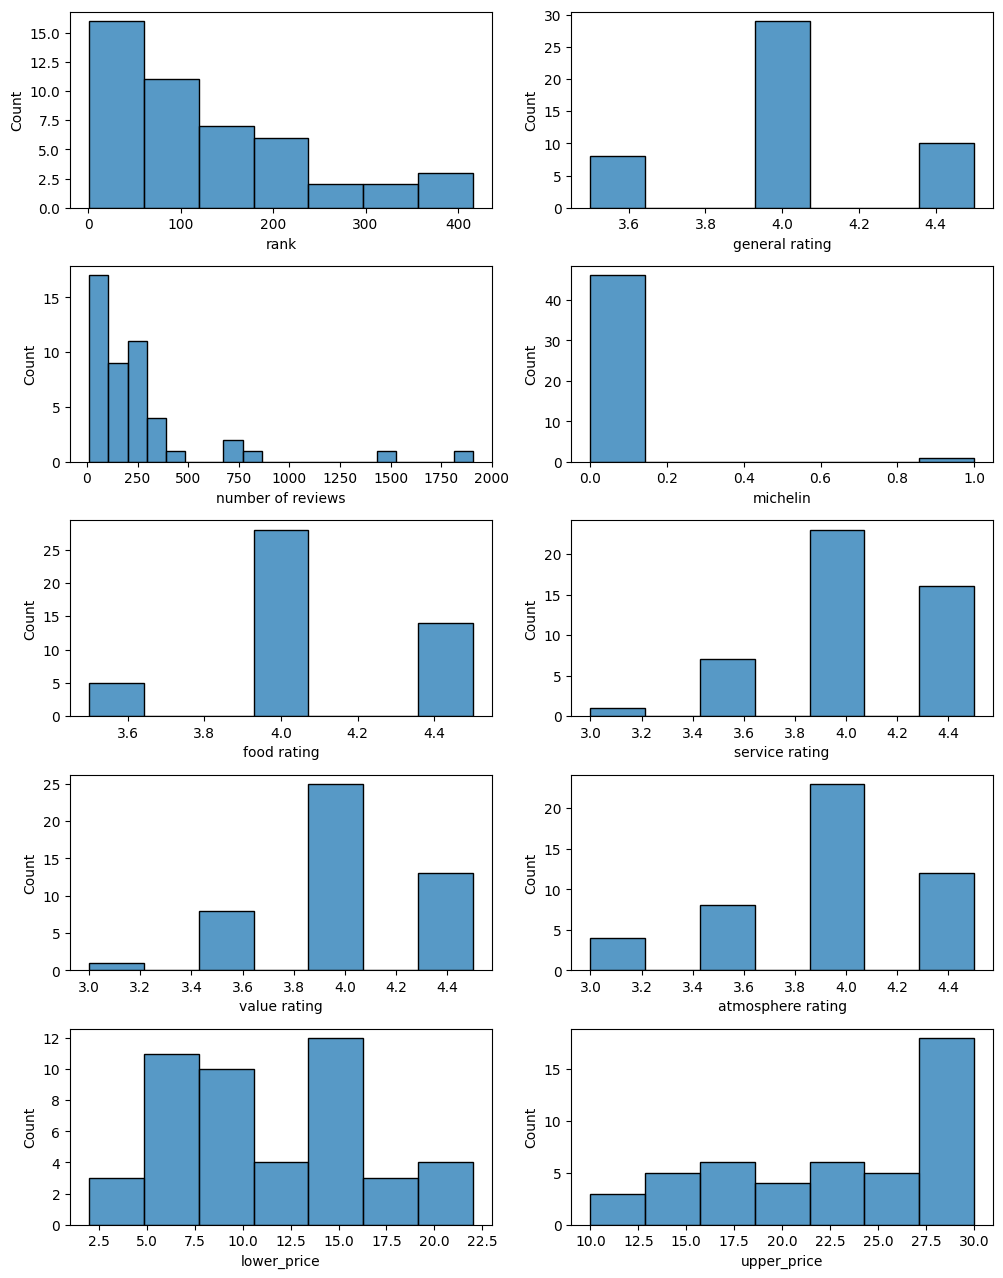

In [ ]:
cheap_restaurants_with_rating=cheap_restaurants.replace(-1,np.nan).dropna()
fig=plt.figure(figsize=(10,15))
for i, col in enumerate(["rank","general rating","number of reviews","michelin","food rating","service rating","value rating","atmosphere rating","lower_price", "upper_price"]):
    plt.subplot(6,2,i+1)
    sns.histplot(cheap_restaurants_with_rating[col])
fig.tight_layout()
plt.show()

* general-, food-,service- and value rating have the same distribution. from this we suspect that these values have high correlations. If one of my ratings is good, the others are very close to it. we could then drop the reduntant features.

* some of the cheap restaurants have more than a thousand reviews! I have to take a closer look at those. Maybe I can find their secret


In [ ]:
cheap_restaurants[cheap_restaurants["number of reviews"]>1000]

restaurant name  rank  general rating  number of reviews  michelin  \
148        Amadeus Ghent 1  84.0             4.0             1906.0     False   
98   Restaurant De Graslei  58.0             4.0             1484.0     False   

     food rating  service rating  value rating  atmosphere rating  \
148          4.0             4.0           4.0                4.0   
98           4.0             4.0           4.0                4.5   

     lower_price  upper_price                      meals   city       id  
148         12.0         20.0  Lunch, Dinner, Late Night  Ghent   740683  
98          18.0         30.0      Lunch, Dinner, Brunch  Ghent  1058490

All of these are located in ghent! that explains the high amount of reviews. But the others, are they not located in ghent? Let's check

In [ ]:
cheap_restaurants=cheap_restaurants.merge(coords,on="id")

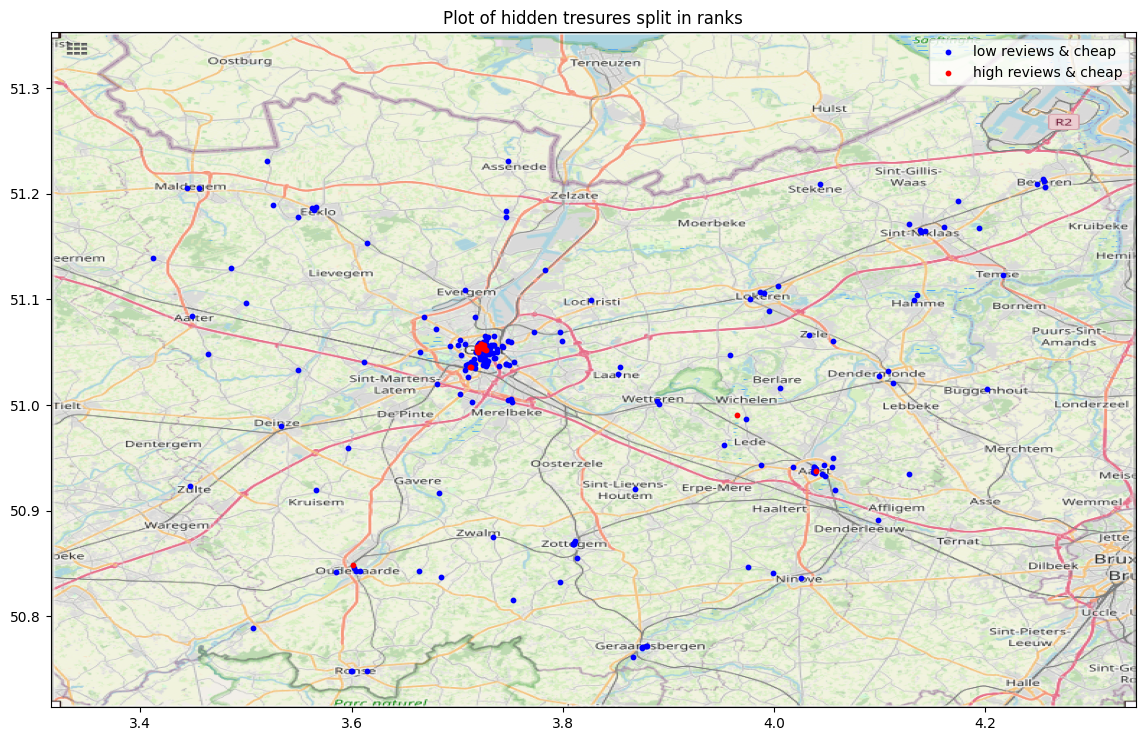

In [ ]:
Bbox = (3.3151,4.3423,50.7139,51.3529)
map = plt.imread("east_flanders.png")

figure, ax = plt.subplots(figsize = (14,16))
low_reviews=cheap_restaurants[cheap_restaurants["number of reviews"]<200]
high_reviews=cheap_restaurants[cheap_restaurants["number of reviews"]>=200]

ax.scatter(low_reviews.longitude, low_reviews.latitude, zorder=1, alpha= 1, c='b',s=10)
ax.scatter(high_reviews.longitude, high_reviews.latitude, zorder=1, alpha= 1, c='r',s=10,)

ax.set_title('Plot of hidden tresures split in ranks')
ax.set_xlim(Bbox[0],Bbox[1])
ax.set_ylim(Bbox[2],Bbox[3])
ax.legend(["low reviews & cheap","high reviews & cheap"])
ax.imshow(map, zorder=0, extent=Bbox, aspect='equal')

I changed the treshold from 1000 to 200 and still,... almost all of the restaurants with high number of reviews are located in bigger cities like ghent or aalst.

## general-, food-,service- and value rating

we already know that these attributes have the same distribution, lets see if they are redundant

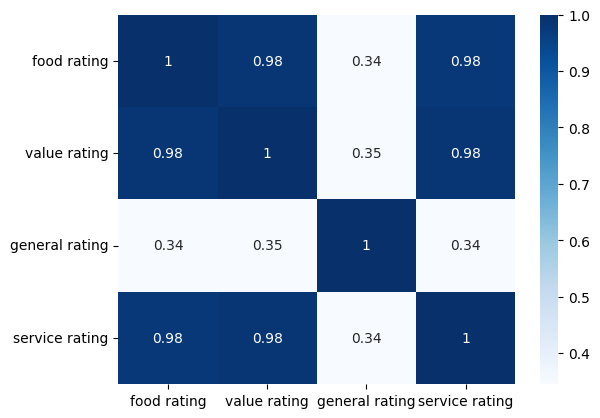

In [ ]:
corr = df_train[["food rating","value rating","general rating","service rating"]].corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues")

Okay, we should have done this earlier😅. Food rating, value rating and service rating have a correlation factor of 0.98. which means that if we know 1 of them, the other ratings won't give us any more interesting information so we can safely drop them.

In [ ]:
df_train.drop(columns=["food rating", "service rating"], inplace=True)

In [ ]:
df_train

rank                 restaurant name  general rating  \
724     6.0                       de Sampan             4.0   
920   366.0                       Orientali             4.5   
1357    6.0            Ardilla Bistro & Bar             5.0   
2335   16.0  FoRest Bar Drink & Food Lounge             1.5   
1599   26.0                 Het Bruggenhuis             3.5   
...     ...                             ...             ...   
1672   26.0                      Beau Rival             3.5   
265   138.0           Gran Gusto Ristorante             4.5   
1397   45.0                           China             3.5   
1921  632.0                   O'Learys Gent             3.0   
2072   11.0            Jfk Hotel-Restaurant             3.5   

      number of reviews                                               tags  \
724                50.0       $$ - $$$|Chinese|Seafood|Vegetarian Friendly   
920                28.0                          $|Japanese|Filipino|Asian   
1357                4.0         Italian|Mediterranean|Spanish|Contemporary   
2335                3.0                    $$ - $$$|Fast Food|Contemporary   
1599               19.0                    $$ - $$$|Belgian|Dutch|European   
...                 ...                                                ...   
1672               21.0                          $$ - $$$|Belgian|European   
265                38.0  $$ - $$$|Italian|Vegetarian Friendly|Vegan Opt...   
1397               21.0                             $$ - $$$|Chinese|Asian   
1921              154.0                          $$ - $$$|American|Bar|Pub   
2072                7.0                             Belgian|Dutch|European   

                                                address      phone number  \
724                        Markt 28, Temse 9140 Belgium   +32 3 711 29 88   
920             Sint-Amandstraat 19, Ghent 9000 Belgium  +32 470 12 34 51   
1357               Eeklostraat 84, Lembeke 9971 Belgium   +32 9 334 54 90   
2335      Emiel Hertecantlaan 57A, Berlare 9290 Belgium  +32 471 31 41 20   
1599  Majoor van Lierdelaan 50, Geraardsbergen 9500 ...   +32 54 24 48 89   
...                                                 ...               ...   
1672            Langemuntstraat 12, Ninove 9400 Belgium               NaN   
265          Kortrijksesteenweg 857, Ghent 9000 Belgium   +32 9 279 18 43   
1397          Grote Markt 38, Sint-Niklaas 9100 Belgium   +32 3 776 05 65   
1921      Dok-Noord 7/301 3th Floor, Ghent 9000 Belgium   +32 9 310 30 10   
2072  President John F. Kennedylaan 2, Zelzate 9060 ...   +32 9 345 64 15   

                                  website url  \
724              http://www.desampan.be/temse   
920                      http://orientali.be/   
1357             http://ardilla-bistrobar.be/   
2335                http://www.forest-bar.be/   
1599               http://www.bruggenhuis.be/   
...                                       ...   
1672                 http://www.beaurival.be/   
265   https://www.facebook.com/Grangusto.Gent   
1397                                      NaN   
1921     http://olearys.be/gent-event-center/   
2072                                      NaN   

                                        menu url  timetable  \
724                                          NaN      False   
920                                          NaN       True   
1357                                         NaN       True   
2335                                         NaN      False   
1599          http://www.bruggenhuis.be/menu.php       True   
...                                          ...        ...   
1672                                         NaN      False   
265                                          NaN       True   
1397                                         NaN       True   
1921  https://olearys.be/gent-event-center/food/       True   
2072                                         NaN      False   

                      email address  trave

## Missing data

let's see how we can fix our missing data problem

In [29]:
df_train.replace(-1,np.nan).isna().sum()

rank                    180
restaurant name           0
general rating          177
number of reviews         0
tags                    169
address                   0
phone number            176
website url             331
menu url               1366
timetable                 0
email address          1000
travelers choice          0
michelin                  0
food rating             861
service rating          854
value rating            854
atmosphere rating      1663
description            1649
dutch description      1839
price range               0
cuisines                270
special diets          1379
meals                   490
restaurant features     643
id                        0
city                      0
dtype: int64

We can't really drop rows with the missing values because it's a big part of our data that we would waste.
* for the rank we already know that it depends on your reviews and your location so maybe we can look at similar restaurants in the same city with the same number of reviews and the same cuisine
* gelijkaardig voor general rating, value rating,atmosphere rating
* description kunnen we mss uit de reviews halen
* cuisines uit de tags?


In [ ]:
def findRank(row):
    #first get all restaurants that have the same city
    #then drop out those that don't have the same amount of reviews
    #then drop out those that don't have the same general_rating or service rating
    #then drop those that have a different quisine
    #then from those that are left, calculate the average rank 

in a seperate notebook i added coordinates hier nog mooie tekst schrijven

In [ ]:
original_df["number of reviews"].str.replace(",","").str.split(" ").str[0].astype(int).sum()

136416

In [ ]:
len(pd.read_csv("tripadvisor_dataset/reviews.csv"))

136173

In [ ]:
coord=pd.read_csv("coordinates.csv")

In [ ]:
coord

id                                        coord
0     13969825                  ('51.0548994', '3.7223248')
1       740727          ('50.7887051', '4.052819574178704')
2     12188645                                   (nan, nan)
3      9710340                  ('51.0582196', '3.7222621')
4      8298124                  ('51.0268308', '4.1005587')
...        ...                                          ...
2576  18220557                  ('50.8528124', '3.7866609')
2577  23571474                  ('50.9032568', '3.5050821')
2578   3956680  ('50.947908850000005', '4.097626326789348')
2579  23363568          ('50.9478251', '4.098753863305806')
2580  24027867          ('50.9999861', '3.548880282553289')

[2581 rows x 2 columns]

In [ ]:
df_train.groupby(["city"])["general rating"]

ideas:
* zoek correlatie tussen rank en een van de rating features
* mss tussen de rating features onderling? dat ze zelfde waarde aangeven en dus overbodig zijn?
* kijk of er clustering is van restaurant prijs en locatie of restaurant prijs en type restaurant. vb er zijn veel meer japanse restaurants in de dure categorie dan japanse restaurants in de goedkope ...
* zie github voor meer